#### Paphos Weather

This page shows various metrics for the weather in Paphos, Cyprus.

Weather data is purchased from Openweather Marketplace [here](https://home.openweathermap.org/marketplace/my_orders)

Download this weather data from here https://drive.google.com/file/d/14GgJu7YfZulZU9_xpS9GVcykdb1nEaUV/view?usp=sharing




In [22]:
# !wget https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/basics/paphosWeather2023.json

In [23]:
def calculate_heat_index(temperature, relative_humidity):
    heat_index = (-8.784695 +
                  1.61139411 * temperature +
                  (2.338549 * relative_humidity) +
                  (-0.14611605 * temperature * relative_humidity) +
                  (-0.01230809 * (temperature ** 2)) +
                  (-0.01642482 * (relative_humidity ** 2)) +
                  (0.00221173 * (temperature ** 2) * relative_humidity) +
                  (0.00072546 * temperature * (relative_humidity ** 2)) +
                  (-0.000003582 * (temperature ** 2) * (relative_humidity ** 2)))
    return heat_index

In [24]:

from datetime import date
from datetime import datetime
import time
import pandas as pd

def toDate(epoch_time):
    return datetime.fromtimestamp(epoch_time)

In [25]:
import pandas as pd

df=pd.read_json('paphosWeather2023.json')

In [26]:
df['dt'].map(toDate)

0       2018-07-01 00:00:00
1       2018-07-01 01:00:00
2       2018-07-01 02:00:00
3       2018-07-01 03:00:00
4       2018-07-01 04:00:00
                ...        
43843   2023-07-01 19:00:00
43844   2023-07-01 20:00:00
43845   2023-07-01 21:00:00
43846   2023-07-01 22:00:00
43847   2023-07-01 23:00:00
Name: dt, Length: 43848, dtype: datetime64[ns]

We have to convert the epoch time to ISO Date, which is something we can read.

The map function runs a function over a series.  A series means a dataframe with one column.  When we write df['new column'] = df['some column'].map(somefunction) it adds the new columns to the dataframe.


In [27]:
df['dateTime']=df['dt'].map(lambda l: toDate(l).strftime("%Y-%m-%d %H:%M:%S"))

In [28]:
df['month']=df['dt'].map(lambda l: toDate(l).strftime("%m"))
df['day']=df['dt'].map(lambda l: toDate(l).strftime("%d"))
df['year']=df['dt'].map(lambda l: toDate(l).strftime("%y"))
df['hour']=df['dt'].map(lambda l: toDate(l).strftime("%H"))
df['hour']=pd.to_numeric(df['hour'])

In [29]:
df['temp']=df["main"].map(lambda x: x["temp"] )
df['temp_min']=df["main"].map(lambda x: x["temp_min"] )
df['temp_max']=df["main"].map(lambda x: x["temp_max"] )
df['humidity']=df["main"].map(lambda x: x["humidity"])

In [30]:
df['heatIndex'] = df.apply(lambda row: calculate_heat_index(row['temp'], row['humidity']), axis=1)


In [31]:

summer=df.loc[df['month'].isin(['06','07','08'])]
afternoon=df.loc[(df['hour'] > 13)]

In [32]:
hot=afternoon[['year','month','day', 'hour' ,'temp','temp_min','temp_max','hour', 'humidity', 'heatIndex']]

We want to caculate the average temperature by date usign the mean() function.  But the problem is that the date is an object inside the **main** object.  See below how to fix that.

In [33]:
hot.sort_values(by='temp_max',ascending=False).head(15)

,year,month,day,hour,temp,temp_min,temp_max,hour,humidity,heatIndex
16526,20,05,19,14,31.61,31.60,38.74,14,38,31.412187
27110,21,08,03,14,31.27,29.51,38.18,14,53,33.719604
16550,20,05,20,14,28.61,28.60,38.18,14,58,30.123010
16502,20,05,18,14,33.61,33.60,38.18,14,28,32.466135
27111,21,08,03,15,30.94,29.34,38.18,15,51,32.714631
27158,21,08,05,14,30.92,28.83,37.63,14,56,33.737977
26270,21,06,29,14,30.36,27.73,37.63,14,52,31.943973
16478,20,05,17,14,29.61,29.60,37.63,14,42,29.466577
27062,21,08,01,14,30.75,29.03,37.07,14,60,34.322023
26271,21,06,29,15,29.98,27.53,37.07,15,56,32.033606


In [34]:
years=hot.groupby('year')

In [39]:
average_columns=years[['temp','temp_min','temp_max','humidity','heatIndex']]

In [41]:
averageByYear=average_columns.mean().sort_values(by='temp',ascending=False)
averageByYear

,temp,temp_min,temp_max,humidity,heatIndex
year,,,,,
18,22.586277,20.862886,23.721815,73.978804,26.462731
21,20.047055,18.391219,21.144586,66.944110,26.715834
22,19.828364,18.110304,21.171816,68.555890,26.222887
19,19.363142,17.893901,19.879397,72.694521,26.099222
20,19.225085,17.883011,19.908249,72.220492,26.464877
23,16.949440,15.360874,17.993396,69.301648,25.965855


<BarContainer object of 6 artists>

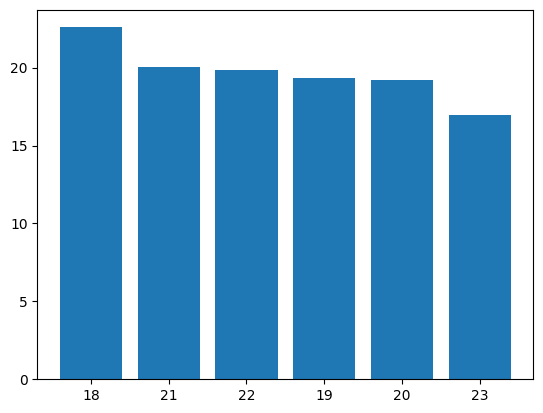

In [45]:
import matplotlib.pyplot as plt
index=averageByYear.index
temp=averageByYear['temp']

plt.bar(index,temp)